### Find and Visualize Missing Data

In [1]:
import pandas as pd
# !pip install missingno

# Load data from our dataset file into a pandas dataframe
# https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/titanic.csv
df = pd.read_csv(r"C:\Users\Lisa Chukwu\Downloads\titanic.csv", index_col=False, sep=",", header=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.shape
#we have 891 rows(containing passenger info) and 12 columns(variables)

(891, 12)

From History, we know we had more than 2000 people on titanic and hence we understand that we have over 1000 missing records

In [3]:
# Calculate the number of empty cells in each column
# The following line consists of three commands.
# the number of missing entries per column
missing_data = df.isnull().sum().to_frame()

# Rename column holding the sums
missing_data = missing_data.rename(columns={0:'Empty Cells'})

# Print the results
print(missing_data)

             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                  177
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarked               2


The age of 177 passengers is unknown, also whether two passengers embarked
There also is missing information of 687 cabin crew persons

<AxesSubplot:>

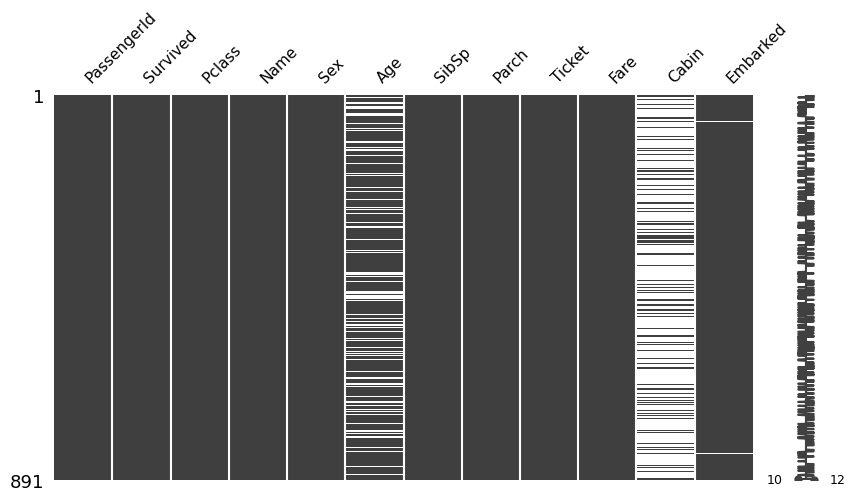

In [4]:
# import missingno package
import missingno as msno

# Plot a matrix chart, set chart and font size
msno.matrix(df, figsize=(10,5), fontsize=11)

In [5]:
# this shows visually that there are more missing records in the age and cabin colums.
# the embarked column has just 2 missing records
# the white bars represent missing entries

#using pandas to get a list of passengers with missing age

In [6]:
unknown_age = df[df["Age"].isnull()]

# Print only the colums we want for the moment (to better fit the screen)
# limit output to 20 rows
unknown_age[["Pclass","PassengerId","Name", "Survived", "Age"]][:20]

,Pclass,PassengerId,Name,Survived,Age
5,3,6,"Moran, Mr. James",0,NaN
17,2,18,"Williams, Mr. Charles Eugene",1,NaN
19,3,20,"Masselmani, Mrs. Fatima",1,NaN
26,3,27,"Emir, Mr. Farred Chehab",0,NaN
28,3,29,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN
29,3,30,"Todoroff, Mr. Lalio",0,NaN
31,1,32,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,NaN
32,3,33,"Glynn, Miss. Mary Agatha",1,NaN
36,3,37,"Mamee, Mr. Hanna",1,NaN
42,3,43,"Kraeff, Mr. Theodor",0,NaN


In [7]:
# list of passengers with missing cabin and embarked info

missing_age = df["Age"].isnull()
missing_cabin = df["Cabin"].isnull()

#passengers missing both
unkn_age_cabin = df[missing_age & missing_cabin]

In [8]:
print("Number of passengers missing both age and cabin info", len(unkn_age_cabin))

Number of passengers missing both age and cabin info 158


Most passengers missing age information are also missing cabin information.

A good hypothesis is that information was not collected well for the passengers with the cheap tickets.

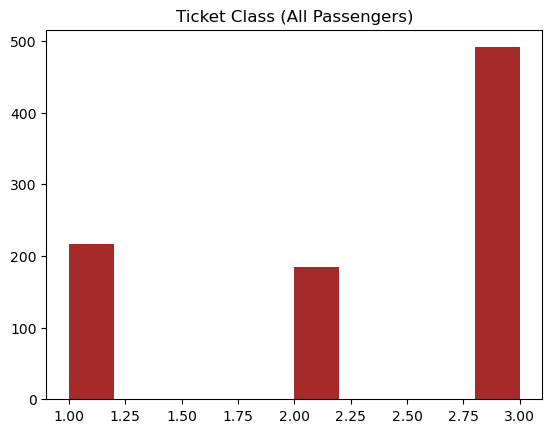

In [9]:
#histogram of ticket classes of passengers with missing info
import matplotlib.pyplot as plt

plt.hist(df['Pclass'],color = 'brown')
plt.title("Ticket Class (All Passengers)")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

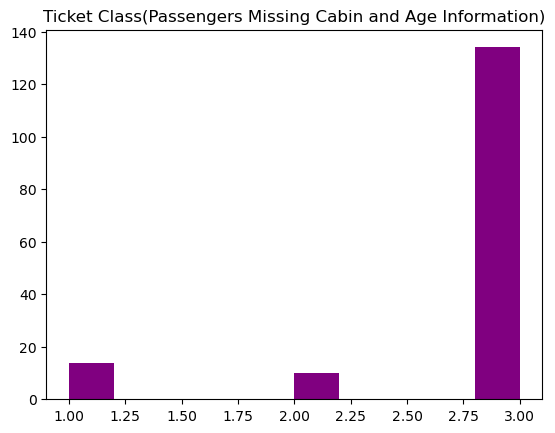

In [10]:
plt.hist(unkn_age_cabin['Pclass'], color='purple')
plt.title("Ticket Class(Passengers Missing Cabin and Age Information)")
plt.show

So a greater percentage of the passengers with missing information are those with cheap tickets 

In [11]:
import numpy as np

mean_age = np.mean(df.Age)
print("The average age on the ship was", mean_age, "years old")

# Now make another model where missing ages contained a 0
df['Age_2'] = df['Age'].fillna(0)
mean_age = np.mean(df.Age_2)
print("The average age on the ship was", mean_age, "years old")

The average age on the ship was 29.69911764705882 years old
The average age on the ship was 23.79929292929293 years old


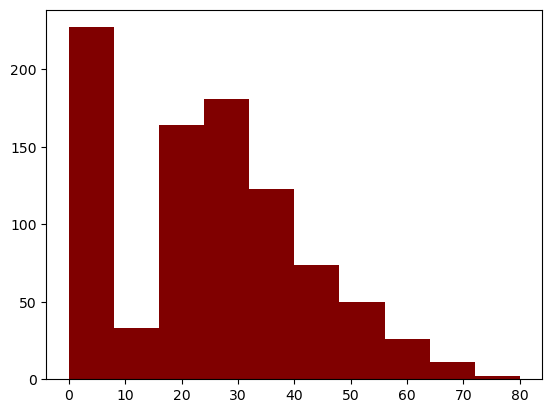

<Figure size 1500x700 with 0 Axes>

In [12]:
plt.hist(df["Age_2"], color = 'maroon')
plt.figure(figsize = (15,7))
plt.show()

# from this now, notice that there is an unlikely number of very young children

In [13]:
#Handling Missing Data

#first, some data from the embarked column is removed, this column has only rwo missing data

print(f"The original size of our dataset was", df.shape)
clean_df = df.dropna(subset=["Embarked"])
clean_df = clean_df.reindex()
print("The shape for the clean dataset is", clean_df.shape)

The original size of our dataset was (891, 13)
The shape for the clean dataset is (889, 13)


In [14]:
# Replacing empty values with the mean Age

# Calculating the mean value for the Age column
mean_age = clean_df["Age"].mean()

print("The mean age is", mean_age)

# Replace empty values in "Age" with the mean calculated above
clean_df["Age"].fillna(mean_age, inplace=True)

# Let's see what the clean dataset looks like now
print(clean_df.isnull().sum().to_frame().rename(columns={0:'Empty Cells'}))

The mean age is 29.64209269662921
             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarked               0
Age_2                  0


Age Column no longer has empty rows.

In [15]:
# The cabin column has categorical data, an unknown category is created and assigned to the missing rows.

# Assign unknow to records where "Cabin" is empty
clean_df["Cabin"].fillna("Unknown", inplace=True)

# Let's see what the clean dataset looks like now
print(clean_df.isnull().sum().to_frame().rename(columns={0:'Empty Cells'}))

             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                  0
Embarked               0
Age_2                  0


There is no more missing data in this dataset.

In the process of cleaning this data, only two records were lost in the Embarked column.

Approximations were made to fill the Age and Cabin columns, and this will influence the performance of any model trained on this data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age_2        891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


### Building a model to predict who survived the Titanic disaster.

In [17]:
#preparing the data
df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_2
0,0,3,male,22.0,1,0,7.2500,NaN,S,22.0
1,1,1,female,38.0,1,0,71.2833,C85,C,38.0
2,1,3,female,26.0,0,0,7.9250,NaN,S,26.0
3,1,1,female,35.0,1,0,53.1000,C123,S,35.0
4,0,3,male,35.0,0,0,8.0500,NaN,S,35.0


In [18]:
# Fill missing cabin information with 'Unknown'
df["Cabin"].fillna("Unknown", inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_2
0,0,3,male,22.0,1,0,7.2500,Unknown,S,22.0
1,1,1,female,38.0,1,0,71.2833,C85,C,38.0
2,1,3,female,26.0,0,0,7.9250,Unknown,S,26.0
3,1,1,female,35.0,1,0,53.1000,C123,S,35.0
4,0,3,male,35.0,0,0,8.0500,Unknown,S,35.0


In [19]:
df.drop(["Age_2"], axis=1, inplace=True)

In [20]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,Unknown,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,Unknown,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Unknown,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,Unknown,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [21]:
#EDA

In [22]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
print("Seaborn Setup Complete!")

Seaborn Setup Complete!


<AxesSubplot:xlabel='Sex', ylabel='count'>

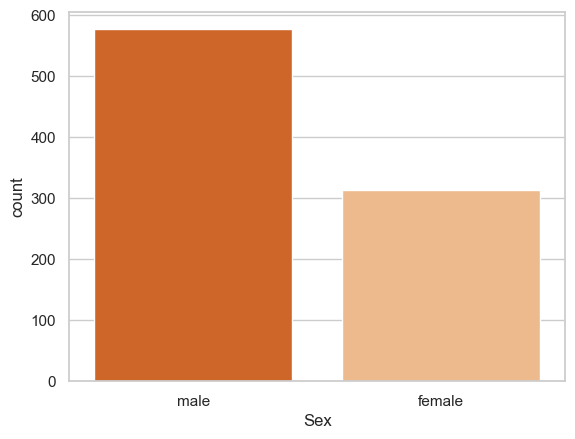

In [23]:
sns.countplot(x = "Sex", data = df, palette = 'Oranges_r')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

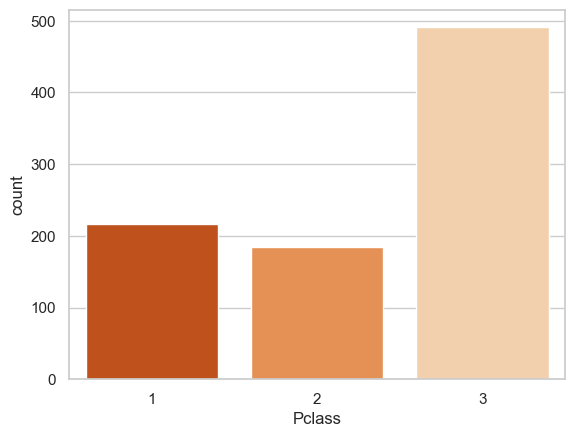

In [24]:
sns.countplot(x = 'Pclass', data = df, palette = 'Oranges_r')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

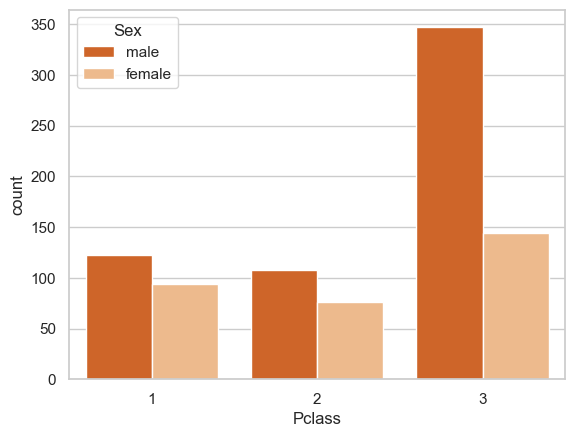

In [25]:
sns.countplot(x="Pclass", hue = "Sex", data = df, palette = 'Oranges_r')

<AxesSubplot:xlabel='Sex', ylabel='count'>

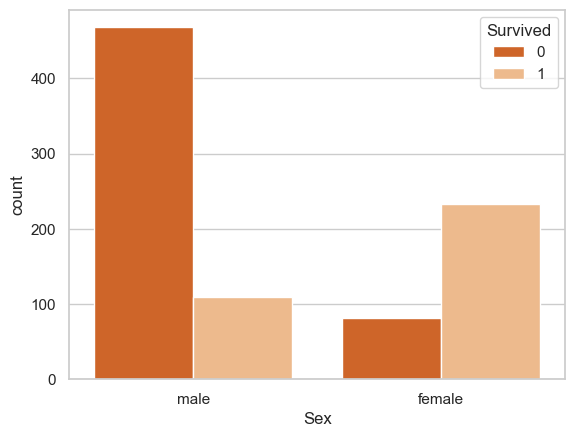

In [26]:
sns.countplot(x="Sex", hue = "Survived", data = df, palette = 'Oranges_r')

In [27]:
# Swap male / female with numerical values
df["IsFemale"] = df.Sex.replace({'male':0, 'female':1})
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,IsFemale
0,0,3,male,22.0,1,0,7.2500,Unknown,S,0
1,1,1,female,38.0,1,0,71.2833,C85,C,1
2,1,3,female,26.0,0,0,7.9250,Unknown,S,1
3,1,1,female,35.0,1,0,53.1000,C123,S,1
4,0,3,male,35.0,0,0,8.0500,Unknown,S,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Unknown,S,0
887,1,1,female,19.0,0,0,30.0000,B42,S,1
888,0,3,female,NaN,1,2,23.4500,Unknown,S,1
889,1,1,male,26.0,0,0,30.0000,C148,C,0


In [28]:
#Ticket class (Pclass) is an Ordinal feature. 
#That means that its potential values (1, 2 & 3) are treated as having an order and being equally spaced. 
#It's possible that this even spacing is simply not correct though - in stories we have heard about the Titanic, the third-class passengers were treated much worse than those in 1st and 2nd class.

#convert Pclass into a categorical feature using one-hot encoding: 
print(f"Possible values for PClass: {df['Pclass'].unique()}")
Pclass_encode = pd.get_dummies(df, columns=["Pclass"], drop_first=False)
Pclass_encode["Pclass"] = df.Pclass
Pclass_encode.head()

Possible values for PClass: [3 1 2]


,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,IsFemale,Pclass_1,Pclass_2,Pclass_3,Pclass
0,0,male,22.0,1,0,7.2500,Unknown,S,0,0,0,1,3
1,1,female,38.0,1,0,71.2833,C85,C,1,1,0,0,1
2,1,female,26.0,0,0,7.9250,Unknown,S,1,0,0,1,3
3,1,female,35.0,1,0,53.1000,C123,S,1,1,0,0,1
4,0,male,35.0,0,0,8.0500,Unknown,S,0,0,0,1,3


In [29]:
#creating a onehotencoding for the cabin column
#taking a look at the cabin column
df['Cabin']

0      Unknown
1          C85
2      Unknown
3         C123
4      Unknown
        ...   
886    Unknown
887        B42
888    Unknown
889       C148
890    Unknown
Name: Cabin, Length: 891, dtype: object

In [30]:
#this displays all cabin data that starts with a C since missing data was filled with unknown

print(df[df['Cabin'].str.contains('C')])

     Survived  Pclass     Sex    Age  SibSp  Parch      Fare        Cabin  \
1           1       1  female  38.00      1      0   71.2833          C85   
3           1       1  female  35.00      1      0   53.1000         C123   
11          1       1  female  58.00      0      0   26.5500         C103   
27          0       1    male  19.00      3      2  263.0000  C23 C25 C27   
55          1       1    male    NaN      0      0   35.5000          C52   
62          0       1    male  45.00      1      0   83.4750          C83   
88          1       1  female  23.00      3      2  263.0000  C23 C25 C27   
110         0       1    male  47.00      0      0   52.0000         C110   
137         0       1    male  37.00      1      0   53.1000         C123   
151         1       1  female  22.00      1      0   66.6000           C2   
177         0       1  female  50.00      0      0   28.7125          C49   
224         1       1    male  38.00      1      0   90.0000          C93   

In [31]:
#onehotencoding for cabin
cabin_encode = pd.get_dummies(df, columns=["Pclass", "Cabin"], drop_first=False)
cabin_encode

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,IsFemale,Pclass_1,Pclass_2,...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_Unknown
0,0,male,22.0,1,0,7.2500,S,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,female,38.0,1,0,71.2833,C,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,female,26.0,0,0,7.9250,S,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,female,35.0,1,0,53.1000,S,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,male,35.0,0,0,8.0500,S,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,S,0,0,1,...,0,0,0,0,0,0,0,0,0,1
887,1,female,19.0,0,0,30.0000,S,1,1,0,...,0,0,0,0,0,0,0,0,0,0
888,0,female,NaN,1,2,23.4500,S,1,0,0,...,0,0,0,0,0,0,0,0,0,1
889,1,male,26.0,0,0,30.0000,C,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#finding column cabin names
cabin_names = list(c for c in cabin_encode.columns if c.startswith("Cabin_"))
cabin_names
print(len(cabin_names), "cabins found")

148 cabins found


In [34]:
# X is the features
X = ["Age", "SibSp", "Parch", "Fare", "IsFemale", "Pclass_1", "Pclass_2", "Pclass_3"] + \
            cabin_names
X

['Age',
 'SibSp',
 'Parch',
 'Fare',
 'IsFemale',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Cabin_A10',
 'Cabin_A14',
 'Cabin_A16',
 'Cabin_A19',
 'Cabin_A20',
 'Cabin_A23',
 'Cabin_A24',
 'Cabin_A26',
 'Cabin_A31',
 'Cabin_A32',
 'Cabin_A34',
 'Cabin_A36',
 'Cabin_A5',
 'Cabin_A6',
 'Cabin_A7',
 'Cabin_B101',
 'Cabin_B102',
 'Cabin_B18',
 'Cabin_B19',
 'Cabin_B20',
 'Cabin_B22',
 'Cabin_B28',
 'Cabin_B3',
 'Cabin_B30',
 'Cabin_B35',
 'Cabin_B37',
 'Cabin_B38',
 'Cabin_B39',
 'Cabin_B4',
 'Cabin_B41',
 'Cabin_B42',
 'Cabin_B49',
 'Cabin_B5',
 'Cabin_B50',
 'Cabin_B51 B53 B55',
 'Cabin_B57 B59 B63 B66',
 'Cabin_B58 B60',
 'Cabin_B69',
 'Cabin_B71',
 'Cabin_B73',
 'Cabin_B77',
 'Cabin_B78',
 'Cabin_B79',
 'Cabin_B80',
 'Cabin_B82 B84',
 'Cabin_B86',
 'Cabin_B94',
 'Cabin_B96 B98',
 'Cabin_C101',
 'Cabin_C103',
 'Cabin_C104',
 'Cabin_C106',
 'Cabin_C110',
 'Cabin_C111',
 'Cabin_C118',
 'Cabin_C123',
 'Cabin_C124',
 'Cabin_C125',
 'Cabin_C126',
 'Cabin_C128',
 'Cabin_C148',
 'Cabin_C2',
 'C

In [ ]:
#Logistic Regression